# Project: Investigating TMDB movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>The TMDB movie dataset contains information about more than 10000 movies, including 21 feature such as, genre, budget, revenue, relese data, cast, etc. . This project will try to find some trends about the movie industry throughout the years and corellations between the different features that will help in answering some questions to predict the movies performance in the future.

   **Questions we will try to tackle:**
  
    1. Is there a relation between the movie budget and its profit?
    2. Is there a relation between the movies budget and its average vote?
    3. Have the profit of the movies growed over the years (with inflation taking into consideration)?
    4. What is the highest released film category for each year?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
> In this section we will try to find the general properties of the dataset and find how to prepare and clean the data 

In [2]:
df = pd.read_csv("tmdb_movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


\# It is obvious that there are alot of irrelevant columns that will not affect our analysis that and could be deleted such as: 
*id, imdb_id, cast, orginal_title, homepage, director, tagline, overview, keywords, production_companies and the release_year(since the release_date is given)*

\# We will also deal with the budget and the revenue columns that are adjusted for inflation (converted into 2010 US dollars)so we will drop orginal budget and revenue and deal with the budget_adj and revenue_adj

In [3]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


\# There are some rows that have missing revenue_adj and budget_adj values, and instead is filled with zeros so we will need to handle them. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

\# The release_year and the release_date datatype should be converted into datetime object.

\# The budget_adj and the revenue_adj datatype should be converted from float to int

\# The only feature that we care about and have null values is genres so we should handle this.

In [5]:
df.duplicated().sum()

1

There are some duplicate rows that could affect our analysis and should be deleted

In [6]:
df["genres"].isna().sum()

23

\# Genres is the only feature that we care about and have null values, and since the number of the rows that have null values is small we can delete them without affecting our analysis 

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The budget_adj and revenue_adj 25 percentile equals zero, which can be true and these values must be missing.
Also the runtime variable min value is zero which is also impossible 

In [8]:
df[df["budget_adj"]==0]["budget_adj"].count(), df[df["revenue_adj"]==0]["revenue_adj"].count() ,df[df["runtime"]==0]["runtime"].count()


(5696, 6016, 31)

Since the runtime columns which have zero values is small we can drop these columns without affecting our analysis. However the budget and the revenue value is large so we will only drop them when we are doing an analysis involving them

### Data Cleaning
In this section, we will try to:
>1. Delete the irrelevent columns
>2. Change the improper datatypes
>3. Delete the duplicated rows
>4. Drop the rows that have null values
>5. Handle runtime, budget_adj and revenue_adj missing values

First, we will delete the irrelevant columns.

In [9]:
del_col  =["id", "imdb_id", "cast", "original_title", "homepage", "director", "tagline", "overview",  "keywords", "production_companies",
           "budget", "revenue"]
df.drop(columns=del_col, inplace=True)
df.head(1)

,popularity,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


Converting the relese_date datatype into datatime object, however the dates before 2000 are parsed to the next century so I applied a function that fixes the years that exceeds 2015 (our dataframe limit)

In [10]:
def fix_date(x):
    if x.year > 2015:
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year,x.month,x.day)


df["release_date"] = pd.to_datetime(df["release_date"])
df["release_date"]= df["release_date"].apply(fix_date)
df["release_date"] = pd.to_datetime(df["release_date"])

Converting the budget_adj and revenue_adj into int and checking if all the convertions succedded
Note: I have used dtype "Int64" to have the ability to keep the NaN value in an integer series

In [11]:
df['budget_adj'] = df['budget_adj'].round().astype('Int64')
df['revenue_adj'] = df['revenue_adj'].round().astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    10866 non-null  float64       
 1   runtime       10866 non-null  int64         
 2   genres        10843 non-null  object        
 3   release_date  10866 non-null  datetime64[ns]
 4   vote_count    10866 non-null  int64         
 5   vote_average  10866 non-null  float64       
 6   release_year  10866 non-null  int64         
 7   budget_adj    10866 non-null  Int64         
 8   revenue_adj   10866 non-null  Int64         
dtypes: Int64(2), datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 785.4+ KB


Dropping the duplicated rows

In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace= True)
df.duplicated().sum()

0

Replacing all zeros in the runtime with then dropping all NaN rows

In [14]:
df["genres"].isnull().sum()

23

In [15]:
df["runtime"].replace(0, np.NaN, inplace=True)
df.dropna(inplace=True)
df["genres"].isnull().sum()

0

Replacing all zeros in budget_adj and revenue_adj with NaN so it would be easier to drop when we need so.

In [16]:
df.replace(0, np.NaN, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10812 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    10812 non-null  float64       
 1   runtime       10812 non-null  float64       
 2   genres        10812 non-null  object        
 3   release_date  10812 non-null  datetime64[ns]
 4   vote_count    10812 non-null  int64         
 5   vote_average  10812 non-null  float64       
 6   release_year  10812 non-null  int64         
 7   budget_adj    5165 non-null   Int64         
 8   revenue_adj   4849 non-null   Int64         
dtypes: Int64(2), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 865.8+ KB


Creating a dataframe free of NaN values for the analysis involving the budget or the revenue

In [17]:
df_clear = df.dropna()[:]
df_clear.head()

,popularity,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445893
1,28.419936,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939,348161292
2,13.112507,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955,271619025
3,11.173104,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919,1902723130
4,9.335014,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174799923,1385748801


<a id='eda'></a>
## Exploratory Data Analysis


### 1) Is there a relation between the movie budget and its profit?

First we create a column expressing the profit 

In [18]:
df_clear["profit_adj"] = df_clear["revenue_adj"] - df_clear["budget_adj"]
df_clear.head(1)

,popularity,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445893,1254445954


Since the budget is a quantative variable and doesn't have clear categories, we will create another variable budget_level which will divide it into four bins:
>1. Low: 0-25%
>2. Medium: 25-50%
>3. Moderately High: 50-75%
>4. High: 75-100%

In [19]:
df_clear["budget_adj"].describe().astype(np.int64)

count         3854
mean      44239993
std       44809254
min              1
25%       13090528
50%       30016111
75%       60613070
max      425000000
Name: budget_adj, dtype: int64

In [20]:
# Bin edges that will be used to "cut" the data into groups
bin_edges= [1, 13090528, 30016111, 60613070, 425000000]

# Labels for the four budget level groups
bin_names = [ "Low", "Medium", "Moderately High", "High"]

In [21]:
# Creates budget_levels column
df_clear["budget_level"] = pd.cut(df_clear["budget_adj"], bin_edges, labels=bin_names)
df_clear.head(1)

,popularity,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,budget_level
0,32.985763,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445893,1254445954,High


Calculating the average profit for each budget level

In [22]:
x = df_clear.groupby("budget_level")["profit_adj"].mean()

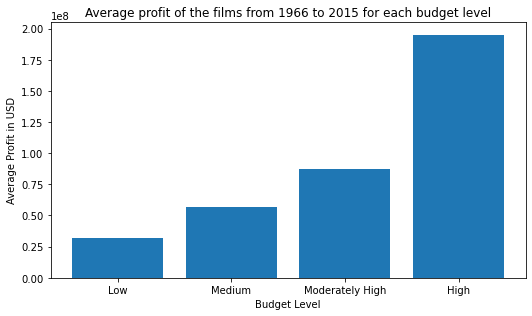

In [23]:
plt.figure(figsize=(7.5, 4.5)) 
plt.bar(x.index, x)
plt.title("Average profit of the films from 1966 to 2015 for each budget level")
plt.xlabel("Budget Level")
plt.ylabel("Average Profit in USD")
plt.tight_layout()

It clear from the bar chart that the high budget films have the largest share of the profits in the post office, which concludes that there is a positive colleration between the films' budget and its profit

### 2) Is there a relation between the movies' budget and its average vote? 

We create a dataset represting each budget level to seperate them in the chart and ploting their budget opposed to the average vote

In [24]:
df_high = df_clear[df_clear["budget_level"]=="High"]
df_mod_high = df_clear[df_clear["budget_level"]== "Moderately High"]
df_medium = df_clear[df_clear["budget_level"]=="Medium"]
df_low = df_clear[df_clear["budget_level"]=="Low"]

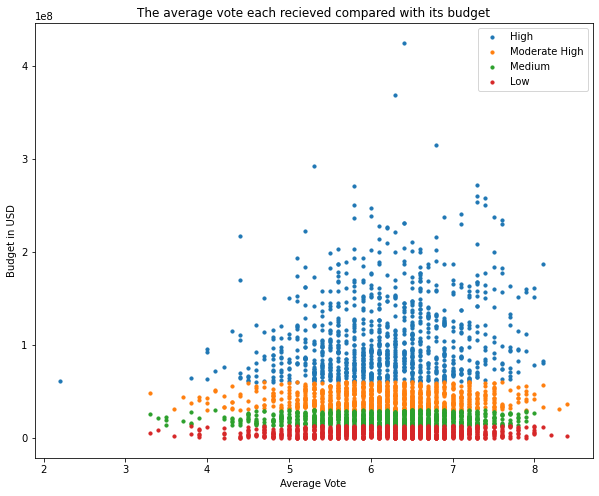

In [25]:
plt.figure(figsize=(10, 8))
plt.scatter(df_high["vote_average"], df_high["budget_adj"], label="High", s=10)
plt.scatter(df_mod_high["vote_average"], df_mod_high["budget_adj"], label= "Moderate High", s=10)
plt.scatter(df_medium["vote_average"], df_medium["budget_adj"], label= "Medium", s=10)
plt.scatter(df_low["vote_average"], df_low["budget_adj"] , label= "Low", s=10)
plt.title("The average vote each recieved compared with its budget")
plt.xlabel("Average Vote")
plt.ylabel("Budget in USD")
plt.legend();

The above chart is clearly normaly distributed and that there are alot of low and medium budget movies which recieved high ratings. Thus, there isn't a direct relation between the movie's budget and its average rating. 

### 3)  Have the average profit of the movies growed over the years (with inflation taking into consideration)? 

We will group the instances by the release year and calulate the average profit for each year

In [26]:
x= df_clear.groupby("release_year")["profit_adj"].mean()

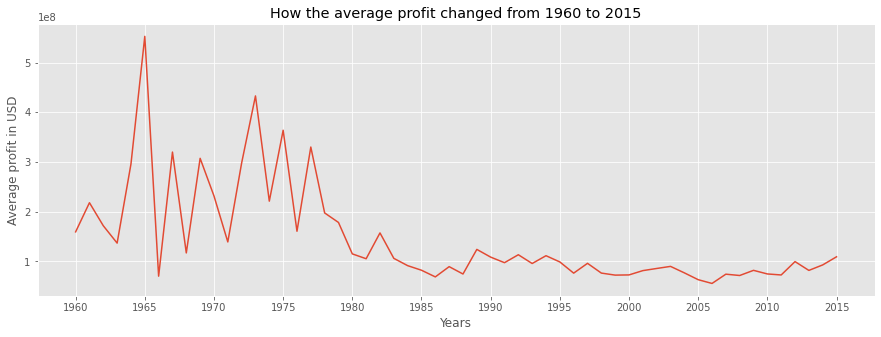

In [27]:
plt.style.use('ggplot')  #Changing the style of the graph
plt.figure(figsize=(15,5))
plt.grid(True)   #Making the grid visible
plt.plot(list(x.index), list(x))
plt.xticks(np.arange(min(x.index), max(x.index)+1, 5))  #Changing the frequency of year to 5 year increment
plt.title("How the average profit changed from 1960 to 2015")
plt.xlabel("Years")
plt.ylabel("Average profit in USD"); 

The line chart shows that there was great fluctautions in average profit in early years and that the average profit have generally decreased throughout the years.  

### 4) What is the highest released film category for each year?

In [28]:
# First we create another dataset so we can analysis and change freely
df_genres  = df[:]

In [29]:
# changing the generes variable into a list splitted at "|"
df_genres["genres"] = df_genres["genres"].str.split('|')

In [30]:
#We want to know the number of categories we have so we create a set and update it at each instance
genre_set =set()
df_genres["genres"].apply(lambda x: genre_set.update(x))
len(genre_set), genre_set

(20,
 {'Action',
  'Adventure',
  'Animation',
  'Comedy',
  'Crime',
  'Documentary',
  'Drama',
  'Family',
  'Fantasy',
  'Foreign',
  'History',
  'Horror',
  'Music',
  'Mystery',
  'Romance',
  'Science Fiction',
  'TV Movie',
  'Thriller',
  'War',
  'Western'})

In [31]:
# We will create a new variable for each genre representing its availablity at each column
for genre in genre_set:
    df_genres[genre] = df_genres["genres"].apply(lambda x: True if genre in x else False)
    
df_genres.head(1)

,popularity,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Animation,...,Action,War,Western,Horror,Science Fiction,Drama,Comedy,History,Romance,Family
0,32.985763,124.0,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,5562,6.5,2015,137999939,1392445893,False,...,True,False,False,False,True,False,False,False,False,False


In [32]:
# We will group by the release year and sum all the columns 
most_released_genre = df_genres.groupby("release_year").sum()

# making a subset for the genres only and finding the maximum genre for each year 
most_released_genre = most_released_genre.loc[:, genre_set].idxmax(axis=1)


most_released_genre

release_year
1960     Drama
1961     Drama
1962     Drama
1963     Drama
1964     Drama
1965     Drama
1966     Drama
1967    Comedy
1968     Drama
1969     Drama
1970     Drama
1971     Drama
1972     Drama
1973     Drama
1974     Drama
1975     Drama
1976     Drama
1977     Drama
1978     Drama
1979     Drama
1980     Drama
1981     Drama
1982     Drama
1983     Drama
1984     Drama
1985    Comedy
1986     Drama
1987    Comedy
1988    Comedy
1989    Comedy
1990     Drama
1991     Drama
1992     Drama
1993     Drama
1994    Comedy
1995     Drama
1996     Drama
1997     Drama
1998     Drama
1999     Drama
2000     Drama
2001    Comedy
2002     Drama
2003     Drama
2004     Drama
2005     Drama
2006     Drama
2007     Drama
2008     Drama
2009     Drama
2010     Drama
2011     Drama
2012     Drama
2013     Drama
2014     Drama
2015     Drama
dtype: object

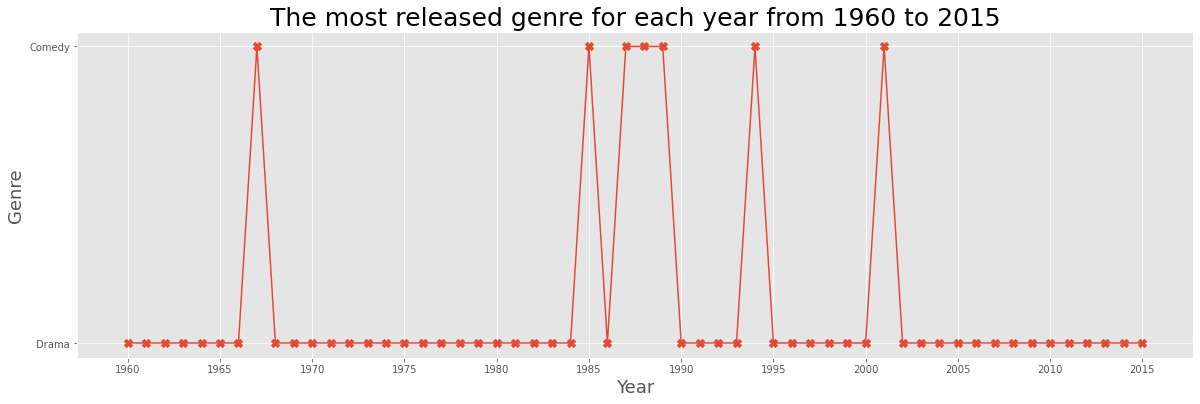

In [39]:
plt.figure(figsize=(20,6))
plt.grid(True)
plt.plot(most_released_genre.index, most_released_genre, marker="X", markersize = 8)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Genre', fontsize=18)
plt.title('The most released genre for each year from 1960 to 2015', fontsize=25)
plt.xticks(np.arange(1960, 2016, 5)); # Changes the frequecy of the years axis to every 5 years     

As illusterated above, the most famous genre throughout the years is Drama, with the exception of 7 where teh comedy dominated  

<a id='conclusions'></a>
## Conclusions
#### question (1):
> From the analysis of the first question we have concluded that the higher budget gains more profit on average and that there is a direct relation between the profit and the movie's budget

#### question (2):
> The second question have shown that the it isn't necessary to pay alot to have a high rating moving and that is no relation between the movies average vote and its budget

#### question (3):
> The third question shows, not as expected, that the average profit throughout the years gave generally decreased, which shows that movies industry recieved more attention in the early years

#### question (4):
>The fourth question have shown that the Drama have been the dominant genre thorughout the years, with the exception of some years where comedy exceded

### limitations:
Some of the limitations that I faced is that more half the values of the budget and the revenue variables equals zero, and these instances have to be ignored. Also another limitation that I faced is the vast differences between the budget and the revenue values which made finding any patterns harder 